In [2]:
import pandas as pd
import numpy as np
from scipy.sparse import load_npz

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, KFold, cross_validate, GridSearchCV
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import joblib
import os 
import warnings
warnings.filterwarnings("ignore")

### Import data

In [3]:
X_trans = load_npz(r"E:\GaTech\GT Courses\ISYE 6740\Final Project\repo\GMT6740\data\X_trans.npz")
y = np.loadtxt(r"E:\GaTech\GT Courses\ISYE 6740\Final Project\repo\GMT6740\data\y.txt")

### Split

In [4]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X_trans, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

## Model

In [6]:
eva_df = pd.DataFrame(columns = ["Model", "RMSE", "MAE", "R2" ])     

### Linear regression

In [5]:
# lin_reg = LinearRegression(fit_intercept=True)

# # K-fold cross validation with k=5
# kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# scores = cross_validate(lin_reg, X_trans, y, cv=kfold, scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error','r2'] )

# mse = -scores['test_neg_mean_squared_error'].mean()
# mae = -scores['test_neg_mean_absolute_error'].mean()
# R2 = scores['test_r2'].mean()

# eva_df = eva_df.append({"Model": "Linear Regression", "RMSE" : mse**0.5, "MAE":mae ,"R2" : R2},ignore_index=True)
# eva_df

In [8]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_train_val, y_train_val)

LinearRegression()

In [ ]:
y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)

eva_df = eva_df.append({"Model": "Linear Regression", "RMSE" : mse**0.5, "MAE":mae ,"R2" : R2},ignore_index=True)
eva_df

In [9]:
joblib.dump(lin_reg, './model/linear_regression.joblib')

['./model/linear_regression.joblib']

In [11]:
t = np.array([3])
t[0]

3

Text(0.5, 1.0, 'Actual vs Residual')

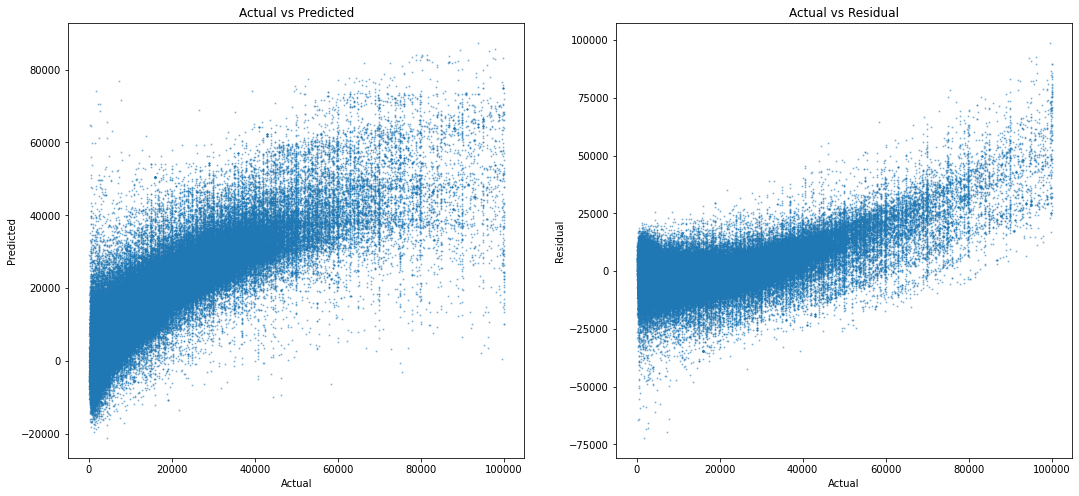

In [17]:
e = y_test - y_pred

fig, ax = plt.subplots(1,2, figsize= (18,8))

ax[0].scatter(y_test, y_pred, s = 1, alpha = 0.4)
ax[0].set_xlabel('Actual')
ax[0].set_ylabel('Predicted')
ax[0].set_title('Actual vs Predicted')

ax[1].scatter(y_test, e, s = 1, alpha = 0.4)
ax[1].set_xlabel('Actual')
ax[1].set_ylabel('Residual')
ax[1].set_title('Actual vs Residual')


### Lasso

In [20]:
# # Create a model instance
# lasso_reg = Lasso()

# # Define the alpha values to be tested
# alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# # GridSearchCV
# kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# lasso_grid = GridSearchCV(estimator=lasso_reg, param_grid={'alpha': alphas}, cv=kfold, return_train_score=True)

# # Fit
# lasso_grid.fit(X_trans,y)

# # Alpha
# alpha = lasso_grid.best_params_['alpha']
# alpha = 0.1

In [21]:
# alpha = 0.1
# # K-fold cross validation with k=10
# lasso_reg = Lasso(alpha=alpha)

# kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# scores = cross_validate(lasso_reg, X_trans, y, cv=kfold, scoring = ['neg_mean_squared_error','neg_mean_absolute_error', 'r2'] )

# # Adding metrics to the evaluation dataframe
# mse = -scores['test_neg_mean_squared_error'].mean()
# mae = -scores['test_neg_mean_absolute_error'].mean()
# R2 = scores['test_r2'].mean()

# eva_df = eva_df.append({"Model": "LASSO regression", "RMSE" : mse**0.5, "MAE":mae, "R2" : R2},ignore_index=True)
# eva_df

In [22]:
lasso_reg = Lasso(fit_intercept=True, alpha = 0.1)
lasso_reg.fit(X_train_val, y_train_val)

y_pred = lasso_reg.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)

eva_df = eva_df.append({"Model": "LASSO regression", "RMSE" : mse**0.5, "MAE":mae ,"R2" : R2},ignore_index=True)
eva_df

,Model,RMSE,MAE,R2
0,Linear Regression,6418.692939,4005.508958,0.743824
1,LASSO regression,6366.597865,3967.095069,0.747966


In [23]:
joblib.dump(lasso_reg, './model/LASSO.joblib')

['./model/LASSO.joblib']

### Ridge

In [24]:
# # Create a model instance
# ridge_reg = Ridge(fit_intercept=True)

# # Define the alpha values to be tested
# alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# # GridSearchCV for alpha
# kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# ridge_grid = GridSearchCV(estimator=ridge_reg, param_grid={'alpha': alphas}, cv=kfold, return_train_score=True)

# # Fit
# ridge_grid.fit(X_trans,y)

# # Best alpha
# alpha = ridge_grid.best_params_['alpha']
# alpha

In [25]:
# alpha=1000
# # K-fold cross validation with k=10
# ridge_reg = Ridge(alpha=alpha)

# kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# scores = cross_validate(ridge_reg, X_trans, y, cv=kfold, scoring = ['neg_mean_squared_error','neg_mean_absolute_error', 'r2'] )
# # Adding metrics to the evaluation dataframe
# mse = -scores['test_neg_mean_squared_error'].mean()
# mae = -scores['test_neg_mean_absolute_error'].mean()
# R2 = scores['test_r2'].mean()

# eva_df = eva_df.append({"Model": "Ridge regression", "RMSE" : mse**0.5, "MAE":mae, "R2" : R2},ignore_index=True)
# eva_df

In [26]:
ridge_reg = Ridge(fit_intercept=True, alpha = 1000)
ridge_reg.fit(X_train_val, y_train_val)

y_pred = ridge_reg.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)

eva_df = eva_df.append({"Model": "Ridge regression", "RMSE" : mse**0.5, "MAE":mae ,"R2" : R2},ignore_index=True)
eva_df

,Model,RMSE,MAE,R2
0,Linear Regression,6418.692939,4005.508958,0.743824
1,LASSO regression,6366.597865,3967.095069,0.747966
2,Ridge regression,9436.608577,6095.569341,0.446297


In [27]:
joblib.dump(ridge_reg, './model/ridge_regression.joblib')

['./model/ridge_regression.joblib']

### PCA

In [28]:
svd = TruncatedSVD(n_components=10)
svd.fit(X_train_val)
X_train_svd = svd.transform(X_train_val)

In [29]:
pca_lin_reg = LinearRegression(fit_intercept=True)
pca_lin_reg.fit(X_train_svd, y_train_val)

X_test_pca = svd.transform(X_test)
y_pred = pca_lin_reg.predict(X_test_pca)

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)

eva_df = eva_df.append({"Model": "Linear regression with SVD", "RMSE" : mse**0.5, "MAE":mae ,"R2" : R2},ignore_index=True)
eva_df

,Model,RMSE,MAE,R2
0,Linear Regression,6418.692939,4005.508958,0.743824
1,LASSO regression,6366.597865,3967.095069,0.747966
2,Ridge regression,9436.608577,6095.569341,0.446297
3,Linear regression with SVD,7384.199165,4695.310027,0.660959


In [30]:
joblib.dump(pca_lin_reg, './model/svd_linear_regression.joblib')

['./model/svd_linear_regression.joblib']